# Sistemas de ecuaciones lineales: introducción

**Objetivo general**
- Plantear y resolver un problema en términos de la solución de un sistema de ecuaciones lineales.

**Objetivos particulares**
- Entender como plantear un problema en términos de un sistema de ecuaciones lineales.
- Usar funciones de la biblioteca `numpy` para resolver el problema.
- Comparar varios métodos para la solución de problemas más complejos.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">MACTI NOTES</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 
        

<a name='1'></a>
## Planes de telefonía móvil.

Dos compañías de telefonía compiten por ganar clientes. En la tabla que sigue se muestra el costo de la renta y el costo por Megabyte (MB) de datos de cada compañía.

|    | Renta mensual | Costo por MB |
|:--:|:----: | :----------: |
| Compañía A  | $200$ | $0.10$       |
| Compañía B  | $20$  | $0.30$       |

**¿Cómo podríamos decidir cuál de estas companías conviene contratar?**

<a name='1-1'></a>
### Modelo matemático
- Observamos en la tabla anterior que la compañía A tiene un precio fijo de 200 pesos mensuales que es 10 veces mayor al precio que cobra la compañía B (20 pesos). 
- Por otro lado, la compañía B cobra 0.30 pesos por cada MB, que es 3 veces mayor al precio por MB de la compañía A. 
- El precio final mensual de cada compañía depende básicamente de cuantos MB se usen. 

Podemos escribir la forma en que cambia el precio de cada compañía en función de los MB usados:

$
\begin{array}{ccc}
P_A & = & 0.10 x + 200 \tag{1}\\
P_B & = & 0.30 x + 20
\end{array}
$

donde $x$ representa el número de MB usados durante un mes. 

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 1. Gráfica de rectas.</font>**

<font color="DarkBlue">En el código siguiente complete las fórmulas para cada compañía de acuerdo con las ecuaciones dadas en (1) y posteriormente ejecute el código para obtener una gráfica de cómo cambia el precio en función de los MB utilizados.</font>

---

In [3]:
# Importación de las bibliotecas numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys, macti.visual

from macti.evaluation import Quizz
quizz = Quizz('1', 'SMM_nbg', 'ejemplos')

Fórmulas a implementar:
$
\begin{array}{ccc}
P_A & = & 0.10 x + 200\\
P_B & = & 0.30 x + 20
\end{array}
$

In [4]:
# Megabytes desde 0 hasta 1500 (1.5 GB) en pasos de 10.
x = np.linspace(0,1500,10)

# Fórmulas de cada compañía
# PA = ...
# PB = ...
#
### BEGIN SOLUTION
PA = 0.10 * x + 200
PB = 0.30 * x + 20

file_answer.write('1', PA, 'Checa la fórmula para PA')
file_answer.write('2', PB, 'Checa la fórmula para PB')
### END SOLUTION

In [5]:
quizz.eval_numeric('1', PA)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [6]:
quizz.eval_numeric('2', PB)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


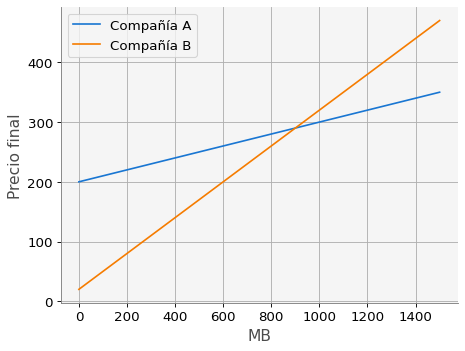

In [7]:
# Gráfica de ambos casos
plt.plot(x, PA, label = 'Compañía A')
plt.plot(x, PB, label = 'Compañía B')

# Decoración de la gráfica
plt.xlabel('MB')
plt.ylabel('Precio final')
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-success">
    
**¿Qué observamos en la figura anterior?**

Para decidir cuál de los dos compañías elegir, debemos saber cuantos MB gastamos al mes. En la figura se ve que al principio, con pocos MB usados conviene contratar a la compañía B. Pero después, si hacemos uso intenso de nuestras redes sociales, el consumo de MB aumenta y como consecuencia el precio de la compañía A es más barato.

**¿Será posible determinar con precisión el punto de cruce de las rectas?**
</div>

<a name='1-2'></a>
### Sistema de ecuaciones lineales.

Las ecuaciones $(1)$ tienen la forma típica de una recta: $y = m x + b$

Para la compañía A tenemos que $m = 0.10$ y $b = 200$, mientras que para la compañía B tenemos $m = 0.35$ y $b = 20$, entonces escribimos:

$$
\begin{array}{ccc}
y & = & 0.10 x + 200 \\
y & = & 0.35 x + 20
\end{array}
$$

Ahora, es posible escribir las ecuaciones de las líneas rectas en forma de un sistema de ecuaciones lineales como sigue:

$$
\left[
\begin{array}{cc}
0.10 & -1 \\
0.35 & -1
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
-200 \\ 
-20
\end{array} \right] \tag{2}
$$

**¿Puede verificar que el sistema (2) es correcto?**

Si resolvemos el sistema (2) entonces será posible conocer de manera precisa el cruce de las rectas.

---
<a name='ej-2'></a>
#### **<font color="DodgerBlue">Ejercicio 2. Solución del sistema lineal.</font>**

<font color="DarkBlue">1. En el siguiente código, complete los datos de la matriz `A` y el vector `b` de acuerdo con el sistema (2).</font>

---

In [8]:
# Definimos la matriz A y el vector b
# A = np.array([[],[]])
# B = np.array([[]])
#
### BEGIN SOLUTION
A = np.array([[0.10, -1.],[0.30,-1.]] )
b = np.array([[-200.0,-20.0]])

file_answer.write('3', A, 'Checa los elementos de la matriz A')
file_answer.write('4', b, 'Checa los elementos del vector b')
### END SOLUTION

print("Matriz A : \n",A)
print("Vector b : \n", b)

Matriz A : 
 [[ 0.1 -1. ]
 [ 0.3 -1. ]]
Vector b : 
 [[-200.  -20.]]


In [9]:
quizz.eval_numeric('3', A)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [10]:
quizz.eval_numeric('4', b)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


---
<font color="DarkBlue">2. Investigue como usar la función <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html">numpy.linalg.solve()</a> para resolver el sistema de ecuaciones. Resuelva el sistema y guarde la solución en el vector `xsol`.</font>

---

In [11]:
# Resolvemos el sistema de ecuaciones lineal
# xsol = np.linalg.solve( ... )
#
### BEGIN SOLUTION
xsol = np.linalg.solve(A,b.T) 

file_answer.write('5', xsol, 'Verifica que usaste correctamente la función np.linalg.solve()')
### END SOLUTION

print("Solución del sistema: \n", xsol)

Solución del sistema: 
 [[900.]
 [290.]]


In [12]:
quizz.eval_numeric('5', xsol)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


---
<font color="DarkBlue">3. Verifique que la solución es correcta multiplicando la matriz `A` por el vector solución `xsol`. El resultado debería ser el vector `b`.</font> **Hint**<font color="Navy">: utilice la función</font> <a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html">numpy.dot()</a>.

---

In [13]:
# Dot product
# rhs = np.dot( ... )
#
### BEGIN SOLUTION
rhs = np.dot(A, xsol)

file_answer.write('6', rhs, 'Checa que la representación de cada número sea la correcta.')
### END SOLUTION

print(rhs)

[[-200.]
 [ -20.]]


In [14]:
quizz.eval_numeric('6', rhs)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


Si todo se hizo correctamente, el siguiente código debe graficar las rectas de las dos compañías y en el punto donde se cruzan

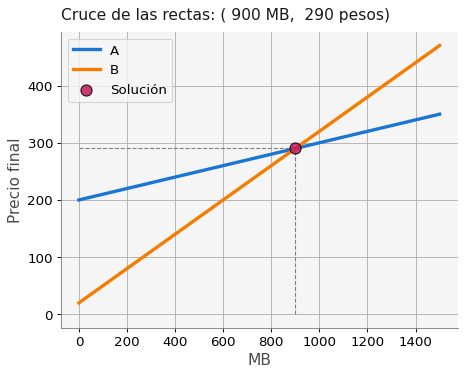

In [15]:
# Gráfica de las líneas de cada compañía
plt.plot(x, PA, lw=3,label = 'A')
plt.plot(x, PB, lw=3,label = 'B')

# Punto de cruce de las líneas rectas
plt.scatter(xsol[0], xsol[1], fc = 'C3', ec ='k', s = 100, alpha=0.85, zorder=5, label='Solución')

# Decoración de la gráfica
plt.xlabel('MB')
plt.ylabel('Precio final')
plt.title('Cruce de las rectas: ({:4.0f} MB, {:4.0f} pesos)'.format(xsol[0][0], xsol[1][0]))
plt.vlines(xsol[0][0], 0, xsol[1][0], ls='--', lw=1.0, color='gray')
plt.hlines(xsol[1][0], 0, xsol[0][0], ls='--', lw=1.0, color='gray')

plt.grid(True)
plt.legend()
plt.show()